In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from lib_logistic import load_dataset, load_extra_datasets

# TensorFlow and tf.keras
from tensorflow import keras
from tensorflow.keras import layers

## Load dataset

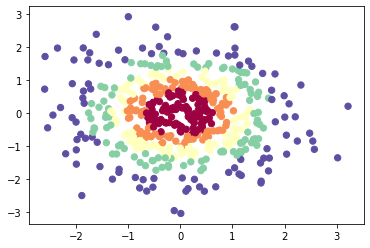

In [2]:
m = 500
n_y = 5
X, Y = load_dataset(m, n_y)
X, Y = X.T, Y.reshape(1, Y.shape[0])
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);

### One Hot Encoding

In [3]:
X = X

In [4]:
def toOneHot (C, labels):
    new_labels = []
    for lable in labels[0]:
        y = np.zeros(C)
        y[lable] = 1
        new_labels.append(y)
    return np.array(new_labels).T
Y = toOneHot(n_y, Y)
X.shape, Y.shape

((2, 500), (5, 500))

In [5]:
n_x, m = X.shape
n_y, m = Y.shape
n_x, n_y, m

(2, 5, 500)

In [6]:
inputs = keras.Input(shape=(n_x,), name='digits')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
x = layers.Dense(64, activation='relu', name='dense_2')(x)
outputs = layers.Dense(n_y, activation='softmax', name='predictions')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model.compile(optimizer=keras.optimizers.RMSprop(),  # Optimizer
              # Loss function to minimize
              loss=keras.losses.CategoricalCrossentropy(),
              # List of metrics to monitor
              metrics=[keras.metrics.CategoricalCrossentropy()])

In [8]:
print('# Fit model on training data')
history = model.fit(X.T, Y.T,
                    batch_size=32,
                    epochs=200
                    # We pass some validation for
                    # monitoring validation loss and metrics
                    # at the end of each epoch
                   )

W0808 16:58:09.342164 140231701550912 deprecation.py:323] From /home/tanh/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Fit model on training data
Train on 500 samples
Epoch 1/200
500/500 [==============================] - 0s 532us/sample - loss: 1.5786 - categorical_crossentropy: 1.5786
Epoch 2/200
500/500 [==============================] - 0s 64us/sample - loss: 1.5236 - categorical_crossentropy: 1.5236
Epoch 3/200
500/500 [==============================] - 0s 61us/sample - loss: 1.4863 - categorical_crossentropy: 1.4863
Epoch 4/200
500/500 [==============================] - 0s 81us/sample - loss: 1.4475 - categorical_crossentropy: 1.4475
Epoch 5/200
500/500 [==============================] - 0s 77us/sample - loss: 1.4058 - categorical_crossentropy: 1.4058
Epoch 6/200
500/500 [==============================] - 0s 54us/sample - loss: 1.3594 - categorical_crossentropy: 1.3594
Epoch 7/200
500/500 [==============================] - 0s 77us/sample - loss: 1.3079 - categorical_crossentropy: 1.3079
Epoch 8/200
500/500 [==============================] - 0s 65us/sample - loss: 1.2563 - categorical_crossentro

500/500 [==============================] - 0s 57us/sample - loss: 0.1740 - categorical_crossentropy: 0.1740
Epoch 68/200
500/500 [==============================] - 0s 70us/sample - loss: 0.1760 - categorical_crossentropy: 0.1760
Epoch 69/200
500/500 [==============================] - 0s 59us/sample - loss: 0.1704 - categorical_crossentropy: 0.1704
Epoch 70/200
500/500 [==============================] - 0s 64us/sample - loss: 0.1700 - categorical_crossentropy: 0.1700
Epoch 71/200
500/500 [==============================] - 0s 65us/sample - loss: 0.1666 - categorical_crossentropy: 0.1666
Epoch 72/200
500/500 [==============================] - 0s 67us/sample - loss: 0.1651 - categorical_crossentropy: 0.1651
Epoch 73/200
500/500 [==============================] - 0s 67us/sample - loss: 0.1616 - categorical_crossentropy: 0.1616
Epoch 74/200
500/500 [==============================] - 0s 53us/sample - loss: 0.1566 - categorical_crossentropy: 0.1566
Epoch 75/200
500/500 [=======================

500/500 [==============================] - 0s 67us/sample - loss: 0.0892 - categorical_crossentropy: 0.0892
Epoch 135/200
500/500 [==============================] - 0s 59us/sample - loss: 0.0892 - categorical_crossentropy: 0.0892
Epoch 136/200
500/500 [==============================] - 0s 60us/sample - loss: 0.0866 - categorical_crossentropy: 0.0866
Epoch 137/200
500/500 [==============================] - 0s 62us/sample - loss: 0.0894 - categorical_crossentropy: 0.0894
Epoch 138/200
500/500 [==============================] - 0s 66us/sample - loss: 0.0878 - categorical_crossentropy: 0.0878
Epoch 139/200
500/500 [==============================] - 0s 67us/sample - loss: 0.0852 - categorical_crossentropy: 0.0852
Epoch 140/200
500/500 [==============================] - 0s 72us/sample - loss: 0.0883 - categorical_crossentropy: 0.0883
Epoch 141/200
500/500 [==============================] - 0s 66us/sample - loss: 0.0820 - categorical_crossentropy: 0.0820
Epoch 142/200
500/500 [===============

In [9]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z,axis=1)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=np.argmax(y,axis=0).ravel(), cmap=plt.cm.Spectral)
    #plt.savefig(fname = "vizu.png", format = 'png')

In [10]:
x = np.array([[-1.80128713e+00,  8.27326332e-01]])

In [11]:
model.predict(x, batch_size=None, verbose=0, steps=None, callbacks=None)

array([[0.0000000e+00, 3.6803181e-31, 2.3778015e-12, 7.9086684e-03,
        9.9209130e-01]], dtype=float32)

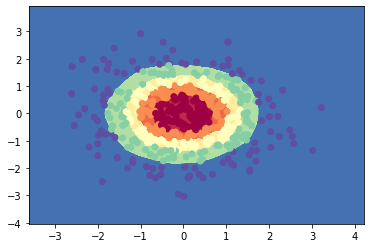

In [12]:
plot_decision_boundary(lambda x: model.predict(x), X,Y)